In [1]:
#! pip install pyoso

In [2]:
from dotenv import load_dotenv
import os
import pandas as pd
from pyoso import Client

load_dotenv()
OSO_API_KEY = os.environ['OSO_API_KEY']
client = Client(api_key=OSO_API_KEY)

In [3]:
query = """
    SELECT 
        m.metric_name as metric_name,
        tm.sample_date as date,
        tm.amount as amount
    FROM timeseries_metrics_by_project_v0 AS tm
    JOIN metrics_v0 AS m ON tm.metric_id = m.metric_id
    JOIN projects_v1 AS p ON tm.project_id = p.project_id
    WHERE p.project_name = 'uniswap'
    ORDER BY tm.sample_date DESC
"""
df = client.to_pandas(query)

In [4]:
df['date'] = pd.to_datetime(df['date'])
df.tail()

,metric_name,date,amount
33904,GITHUB_repositories_monthly,2018-10-01,2.0
33905,GITHUB_contributors_monthly,2018-10-01,1.0
33906,GITHUB_commits_monthly,2018-10-01,23.0
33907,GITHUB_active_developers_monthly,2018-10-01,1.0
33908,GITHUB_stars_monthly,2018-10-01,1.0


In [5]:
df.groupby('metric_name')['date'].max().sort_values().tail()

metric_name
GITHUB_comments_daily        2025-03-25
GITHUB_opened_issues_daily   2025-03-25
GITHUB_contributors_daily    2025-03-25
GITHUB_repositories_daily    2025-03-25
GITHUB_commits_daily         2025-03-25
Name: date, dtype: datetime64[ns]

<Axes: xlabel='date'>

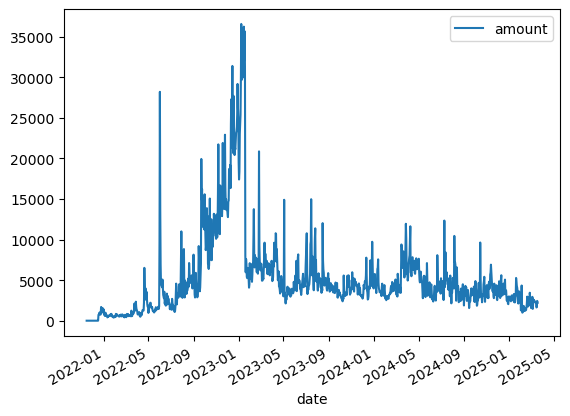

In [6]:
(df.query("metric_name == 'OPTIMISM_transactions_daily'").plot(kind='line', x='date', y='amount'))

In [7]:
query = """
    SELECT 
        p.display_name,
        APPROX_DISTINCT(artifact_name) AS num_contracts
    FROM artifacts_by_project_v1 AS a
    JOIN projects_v1 AS p ON a.project_id = p.project_id
    WHERE
        p.project_source = 'OP_ATLAS'
        AND a.artifact_source = 'OPTIMISM'
    GROUP BY 1
    ORDER BY 2 DESC
"""
df_contracts_by_project = client.to_pandas(query)

In [8]:
df_contracts_by_project.head(10)

,display_name,num_contracts
0,Thales Protocol,694836
1,AuralGenius,236815
2,CyberWallet,198655
3,Solis Protocol,48638
4,Zora,40166
5,Polynomial Trade,25142
6,Boost,23107
7,Velodrome Finance,16597
8,thirdweb,12622
9,Synapse Protocol,11543
